In [ ]:
# pip install numpypip 
# install matplotlib
# pip install pandas
# pip install seaborn



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df =pd.read_csv('Expanded_data_with_more_features.csv')
print(df.head())


   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [10]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [11]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  Nr

In [13]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop Unnamed Column

In [16]:
df= df.drop("Unnamed: 0", axis = 1)
print(df.head())


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Gender Distribution

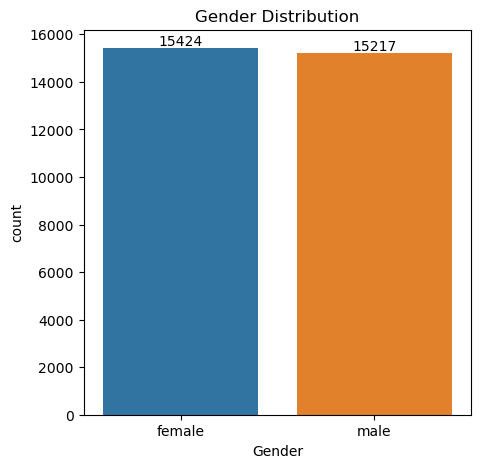

In [35]:
plt.figure(figsize= (5,5))
ax= sns.countplot(data= df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

From the Above Chart We have Conclude that the number of Females are than the number of Males 

In [19]:
gb = df.groupby("ParentEduc").agg({"MathScore": "mean", "ReadingScore": 'mean', "WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


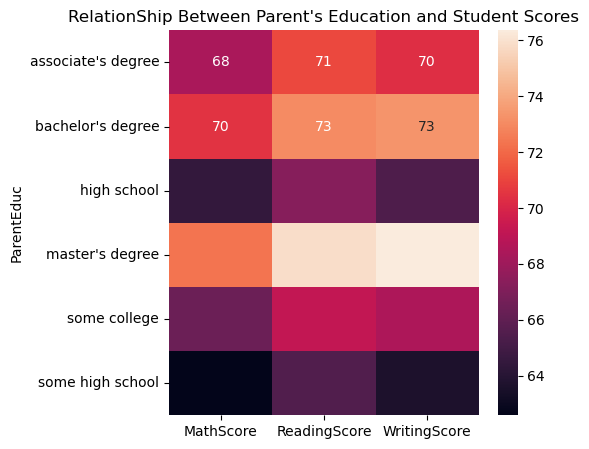

In [41]:

plt.figure(figsize=(5, 5))
sns.heatmap(gb, annot=True)
plt.title("RelationShip Between Parent's Education and Student Scores")
plt.show()

**From the Above Chart We have Concluded that Parent's Edu have a good impact on the Student grades**

In [30]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "ReadingScore": 'mean', "WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


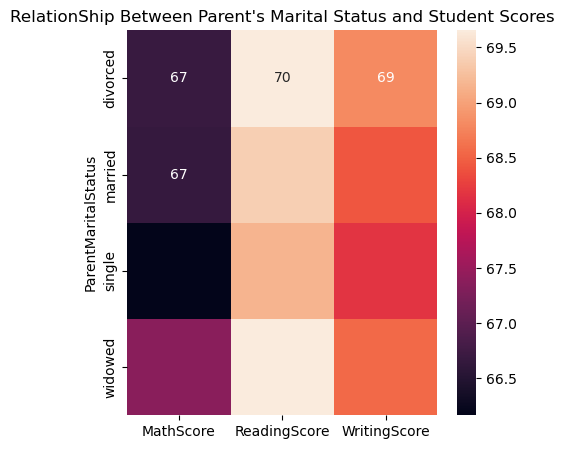

In [40]:
plt.figure(figsize=(5, 5))
sns.heatmap(gb1, annot = True)
plt.title("RelationShip Between Parent's Marital Status and Student Scores")
plt.show()

**From the Above Chart We Have Conclude that Parent's Marital Status has no or negiligle impact on the student scores**

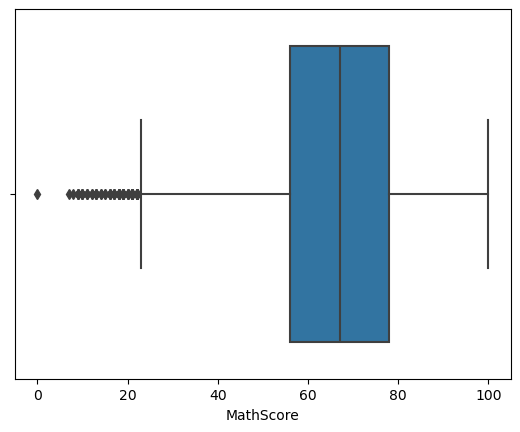

In [42]:
sns.boxplot(data= df, x="MathScore")
plt.show()

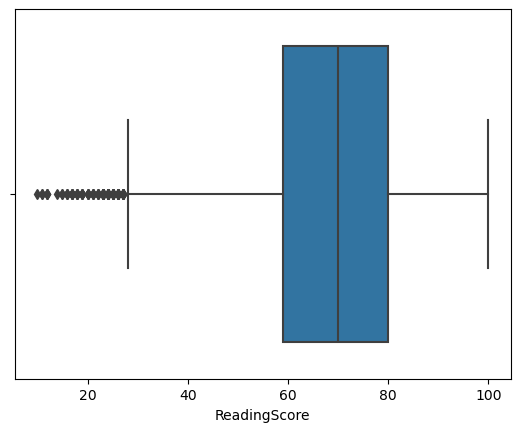

In [45]:
sns.boxplot(data= df, x="ReadingScore")
plt.show()

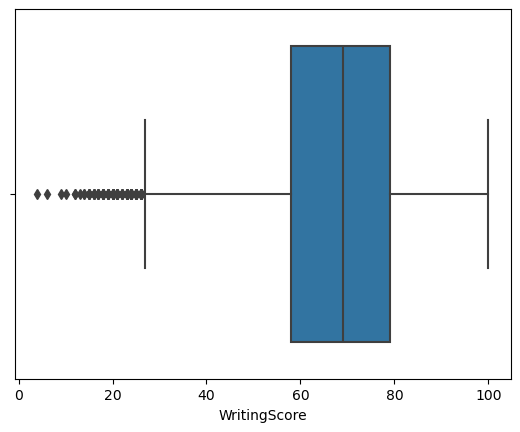

In [46]:
sns.boxplot(data= df, x="WritingScore")
plt.show()

In [49]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Group

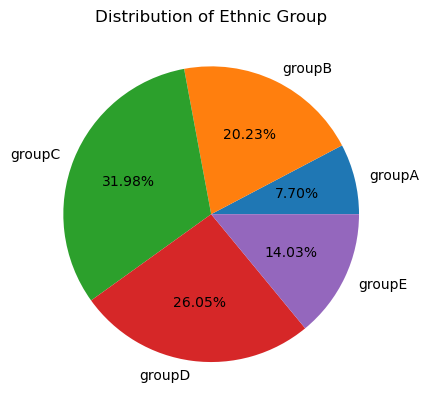

In [56]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l = ["groupA","groupB", "groupC", "groupD", "groupE"]
mlist= [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

plt.pie(mlist, labels=l, autopct= "%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()

In [ ]:
ax = df.countplot(data=df, x="EthnicGroup")
ax.bax_count(ax.container